In [1]:
import os
from xml.etree import ElementTree
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imshow, imread
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import ensemble
from sklearn.metrics import accuracy_score
import cv2
import matplotlib.colors as colors
from PIL import Image

# Creating the database

In [2]:
annotations_path = "E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations"
images_path = "E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\JPEGImages"

In [3]:
tags = []
images = []

## Creating dict for object-tag

In [4]:
%%time

dataset_dict = {}

for file in os.listdir(annotations_path):
    file_path = os.path.join(annotations_path, file)
    print(file_path)
    dom = ElementTree.parse(file_path)
    objects = dom.findall("object")
    for object in objects:
        if len(objects) == 1:
            object_label = object.find("name").text
        elif object.find("truncated").text == "1":
            continue
        else:
            object_label = object.find("name").text
            break
    dataset_dict[file] = object_label

E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000005.xml
E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000007.xml
E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000009.xml
E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000012.xml
E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000016.xml
E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000017.xml
E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000019.xml
E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000020.xml
E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000021.xml
E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000023.xml
E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000024.xml
E:\Projects\ExtractingImageFeaturesHSV\VOCdevkit\VOC2007\Annotations\000026.xml
E:\Projects\ExtractingImageFeaturesHSV\V

In [5]:
dataset_dict

{'000005.xml': 'chair',
 '000007.xml': 'car',
 '000009.xml': 'horse',
 '000012.xml': 'car',
 '000016.xml': 'bicycle',
 '000017.xml': 'person',
 '000019.xml': 'cat',
 '000020.xml': 'car',
 '000021.xml': 'person',
 '000023.xml': 'person',
 '000024.xml': 'train',
 '000026.xml': 'car',
 '000030.xml': 'bicycle',
 '000032.xml': 'aeroplane',
 '000033.xml': 'aeroplane',
 '000034.xml': 'aeroplane',
 '000035.xml': 'aeroplane',
 '000036.xml': 'dog',
 '000039.xml': 'tvmonitor',
 '000041.xml': 'tvmonitor',
 '000042.xml': 'tvmonitor',
 '000044.xml': 'cat',
 '000046.xml': 'bird',
 '000047.xml': 'car',
 '000048.xml': 'bird',
 '000050.xml': 'bottle',
 '000051.xml': 'motorbike',
 '000052.xml': 'pottedplant',
 '000060.xml': 'pottedplant',
 '000061.xml': 'boat',
 '000063.xml': 'dog',
 '000064.xml': 'bird',
 '000065.xml': 'dog',
 '000066.xml': 'person',
 '000072.xml': 'person',
 '000073.xml': 'pottedplant',
 '000077.xml': 'pottedplant',
 '000078.xml': 'dog',
 '000081.xml': 'sofa',
 '000083.xml': 'car',
 '0

## Reading images and creating image and tag lists

In [6]:
for _, item in dataset_dict.items():
    tags.append(item)

In [7]:
for key in dataset_dict:
    file_path = os.path.join(images_path, key.replace('.xml', '.jpg'))
    image = Image.open(file_path)
    new_img = image.resize((256, 256))
    img = np.array(new_img)
    images.append(img)

In [8]:
images

[array([[[  7,   8,   8],
         [ 10,  10,  10],
         [ 10,  12,  10],
         ...,
         [165, 187, 193],
         [164, 188, 195],
         [162, 187, 194]],
 
        [[ 25,  28,  30],
         [ 13,  13,  16],
         [  8,   7,   9],
         ...,
         [164, 190, 195],
         [164, 189, 196],
         [164, 189, 196]],
 
        [[102, 112, 114],
         [ 94, 103, 106],
         [ 78,  86,  88],
         ...,
         [166, 192, 199],
         [167, 191, 198],
         [165, 189, 196]],
 
        ...,
 
        [[ 18,   8,   5],
         [ 20,   8,   3],
         [ 26,   6,   0],
         ...,
         [ 68,  80, 111],
         [ 60,  71, 103],
         [ 56,  66,  98]],
 
        [[ 32,  11,   5],
         [ 34,  10,   2],
         [ 52,  16,   5],
         ...,
         [ 58,  72, 103],
         [ 59,  73, 102],
         [ 63,  76, 107]],
 
        [[ 48,  15,   5],
         [ 71,  25,  12],
         [ 82,  26,   9],
         ...,
         [ 57,  73, 103],
  

In [9]:
tags

['chair',
 'car',
 'horse',
 'car',
 'bicycle',
 'person',
 'cat',
 'car',
 'person',
 'person',
 'train',
 'car',
 'bicycle',
 'aeroplane',
 'aeroplane',
 'aeroplane',
 'aeroplane',
 'dog',
 'tvmonitor',
 'tvmonitor',
 'tvmonitor',
 'cat',
 'bird',
 'car',
 'bird',
 'bottle',
 'motorbike',
 'pottedplant',
 'pottedplant',
 'boat',
 'dog',
 'bird',
 'dog',
 'person',
 'person',
 'pottedplant',
 'pottedplant',
 'dog',
 'sofa',
 'car',
 'person',
 'car',
 'dog',
 'train',
 'cat',
 'cat',
 'cat',
 'cat',
 'cow',
 'bird',
 'person',
 'dog',
 'person',
 'aeroplane',
 'cat',
 'dog',
 'tvmonitor',
 'cat',
 'train',
 'bicycle',
 'bicycle',
 'boat',
 'boat',
 'bus',
 'person',
 'car',
 'person',
 'dog',
 'bird',
 'car',
 'cat',
 'person',
 'chair',
 'horse',
 'car',
 'boat',
 'sofa',
 'bird',
 'bird',
 'car',
 'tvmonitor',
 'person',
 'motorbike',
 'person',
 'car',
 'bottle',
 'bottle',
 'horse',
 'person',
 'person',
 'car',
 'boat',
 'tvmonitor',
 'bird',
 'person',
 'person',
 'person',
 'pe

# Extracting the features

In [58]:
def color_hist_hsv_desc(image):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hue = cv2.calcHist([image], [0], mask=None, histSize=[256], ranges=[0, 256])
    saturation = cv2.calcHist([image], [1], mask=None, histSize=[256], ranges=[0, 256])
    value = cv2.calcHist([image], [2], mask=None, histSize=[256], ranges=[0, 256])

    hist = np.ravel(hue).tolist() + np.ravel(saturation).tolist() + np.ravel(value).tolist()
    return hist

In [76]:
def color_hist_hsv_desc(img):
    array=np.asarray(img)
    arr=(array.astype(float))/255.0
    img_hsv = colors.rgb_to_hsv(arr[...,:3])

    lu1=img_hsv[...,0].flatten()
    # plt.hist(lu1*360,bins=360,range=(0.0,360.0),histtype='stepfilled', label='Hue')
    # plt.title("Hue")
    # plt.xlabel("Value")
    # plt.ylabel("Frequency")
    # plt.legend()
    # plt.show()
    return lu1

In [21]:
def color_hist_hsv_desc(img):
    img_hsv = colors.rgb_to_hsv(img[...,:3])
    (hist, _) = np.histogram(img_hsv.ravel(), bins=np.arange(0,10000+1), range=(0,10000))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

In [22]:
%%time

images_hsv = []
for image in images:
    hist = np.array(color_hist_hsv_desc(image))
    images_hsv.append(hist)

Wall time: 2min 21s


In [103]:
print(images_hsv)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



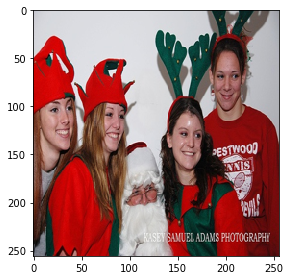

In [12]:
imshow(images[542])

<function matplotlib.pyplot.show(close=None, block=None)>

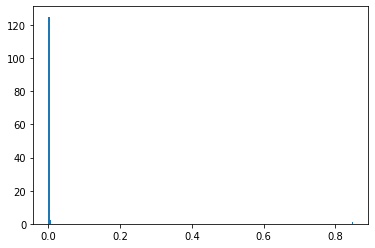

In [13]:
plt.hist(images_hsv[542], 256)
plt.show

In [80]:
len(images_hsv[1234])

65536

# Data splitting

In [23]:
train_ds, test_ds, train_tags, test_tags = train_test_split(images_hsv, tags, test_size=0.2, shuffle=True)

In [82]:
train_tags

['pottedplant',
 'car',
 'person',
 'car',
 'pottedplant',
 'person',
 'bicycle',
 'person',
 'bird',
 'sofa',
 'bird',
 'pottedplant',
 'car',
 'person',
 'dog',
 'bicycle',
 'person',
 'person',
 'bird',
 'sheep',
 'bottle',
 'person',
 'bicycle',
 'person',
 'dog',
 'cat',
 'bottle',
 'dog',
 'chair',
 'tvmonitor',
 'motorbike',
 'car',
 'person',
 'cat',
 'boat',
 'person',
 'dog',
 'aeroplane',
 'dog',
 'person',
 'train',
 'bottle',
 'cow',
 'person',
 'sheep',
 'person',
 'bottle',
 'bird',
 'train',
 'tvmonitor',
 'dog',
 'bus',
 'horse',
 'person',
 'tvmonitor',
 'person',
 'bus',
 'cat',
 'aeroplane',
 'bird',
 'horse',
 'person',
 'bird',
 'tvmonitor',
 'motorbike',
 'car',
 'cat',
 'aeroplane',
 'bicycle',
 'bus',
 'bicycle',
 'aeroplane',
 'bird',
 'cat',
 'train',
 'car',
 'car',
 'pottedplant',
 'tvmonitor',
 'car',
 'motorbike',
 'car',
 'cat',
 'horse',
 'person',
 'horse',
 'motorbike',
 'bird',
 'boat',
 'sofa',
 'horse',
 'pottedplant',
 'person',
 'bottle',
 'dinin

# Dimensionality Reduction

# Training

In [24]:
model = ensemble.RandomForestClassifier()
model.fit(train_ds, train_tags)

RandomForestClassifier()

# Prediction

In [25]:
predicts = model.predict(test_ds)

accuracy = accuracy_score(y_true=test_tags, y_pred = predicts)
print("Accuracy = ", accuracy)

Accuracy =  0.18544366899302095
